# Project on Predicting the attrition of Employee in a Company

In [1]:
#importing the required libraries
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/hrdepartment20_may_2020.csv


importing the data set 

In [2]:
employee_df = pd.read_csv('../input/hrdepartment20_may_2020.csv')
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
#replacing Yes/no in attrition column with 1/0
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


In [6]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


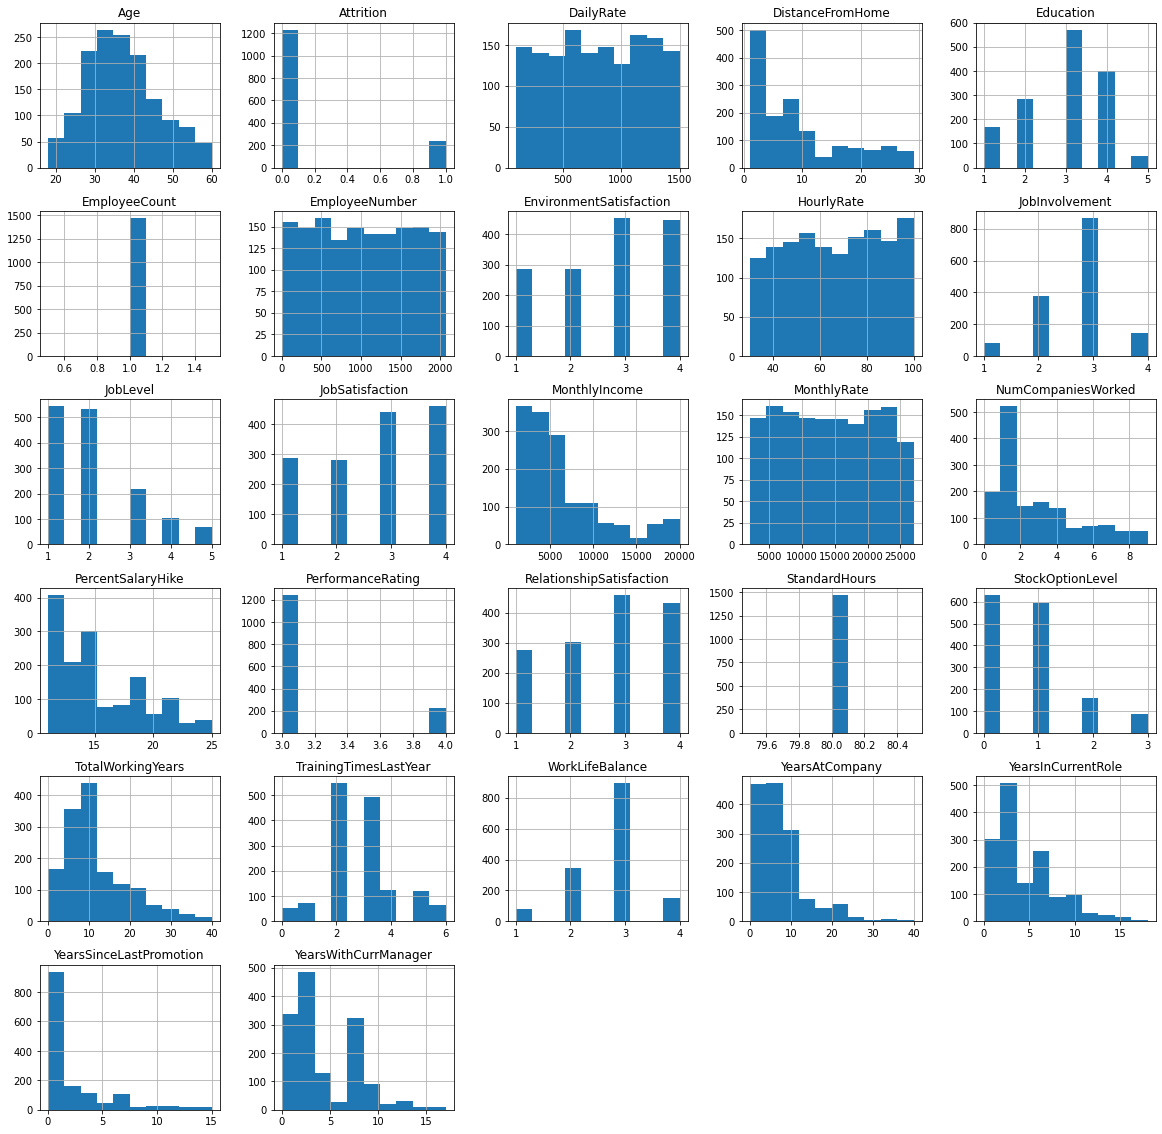

In [7]:
employee_df.hist(figsize=(20,20))
plt.show()

In [8]:
#Removing EmployeeCount, EmployeeNumber, Over18, StandardHours as they dont add much value to the code

employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [9]:
employee_df.shape

(1470, 31)

Shape has reduced from 35 to 31 columns as we dropped 4 columns

In [10]:
#dataframes for people who stayed or left
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

# Lets analyse the data now

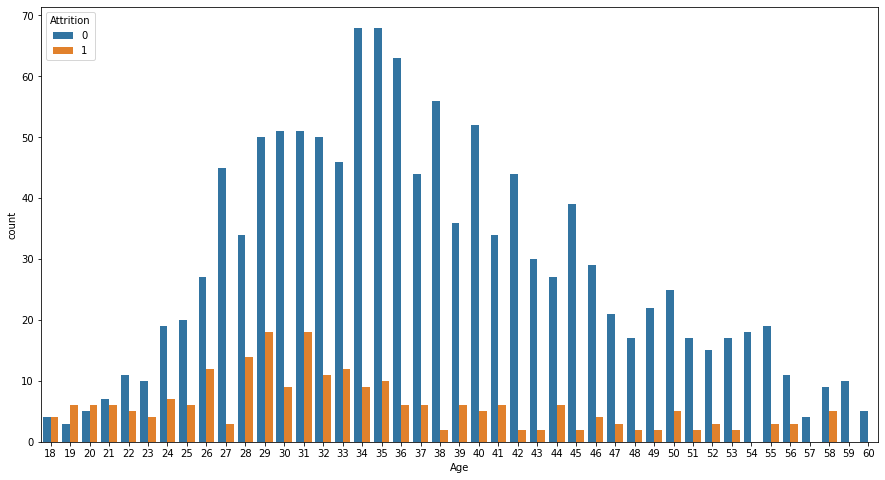

In [11]:
#based on Age
plt.figure(figsize=[15, 8])
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df)
plt.show()

From the graph above, it could be observed that there were higher percentage of people leaving the firm at lower age .
This is quite evident from general intuition as well

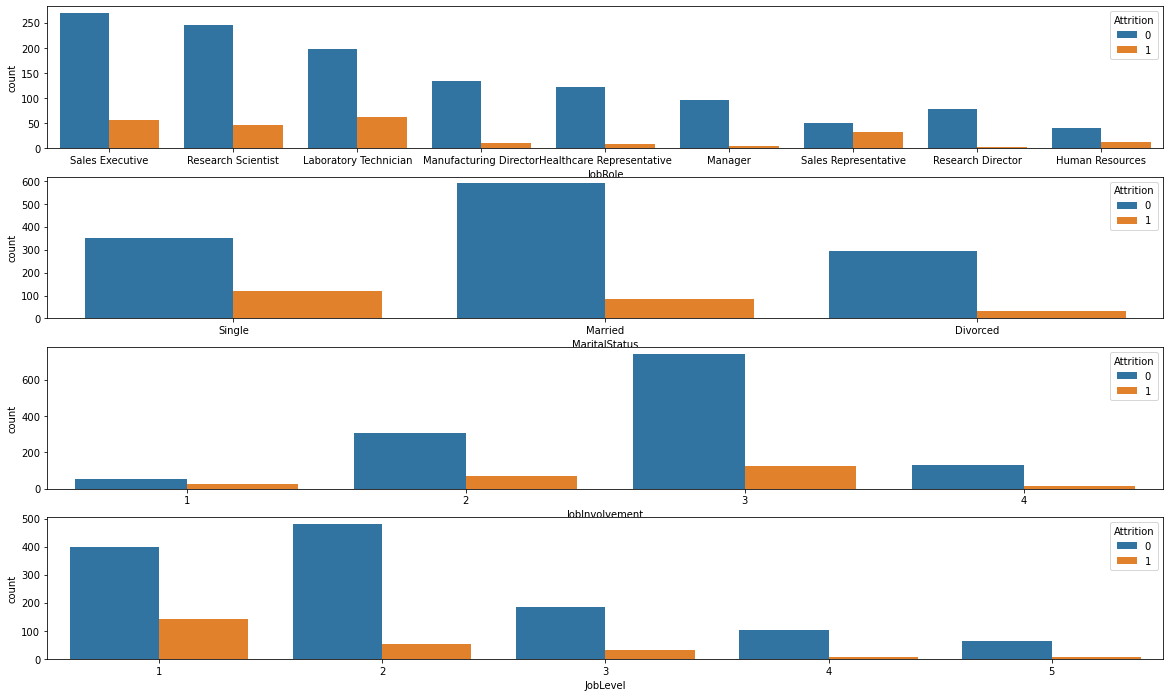

In [12]:
plt.figure(figsize=[20,12])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)
plt.show()

Text(0.5, 0, 'Distance From Home')

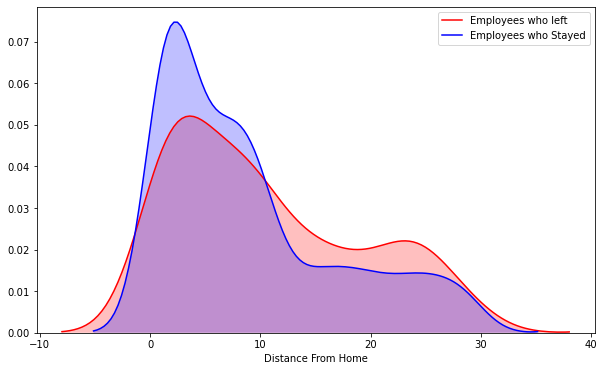

In [13]:

plt.figure(figsize=(10,6))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Distance From Home')

From the curve, it seems employees staying far from home have higher chances of attrition

Text(0.5, 0, 'Total Working Years')

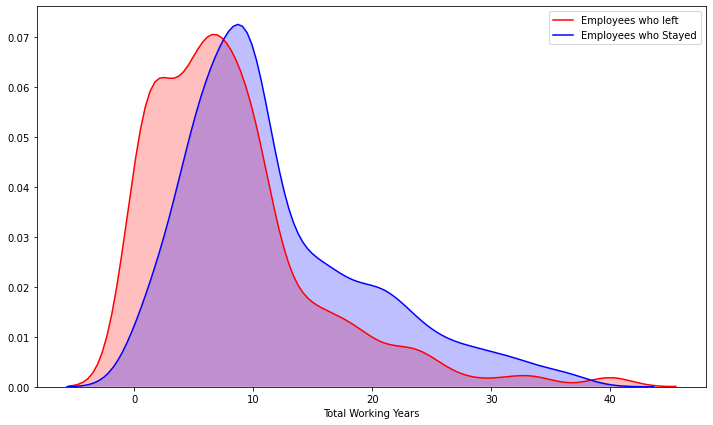

In [14]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['TotalWorkingYears'], shade = True, label = 'Employees who left', color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], shade = True, label = 'Employees who Stayed', color = 'b')

plt.xlabel('Total Working Years')

Employees with less total working years have higher attrition

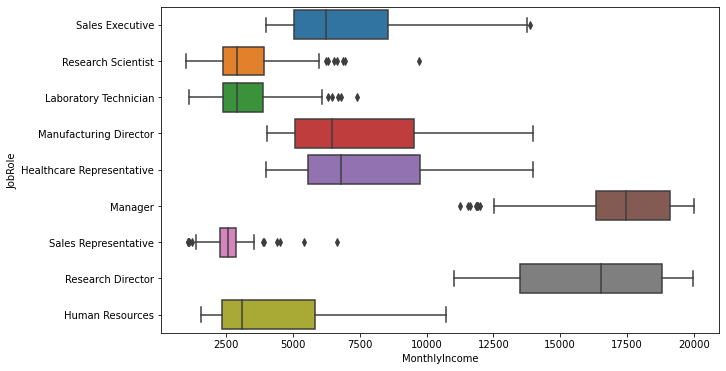

In [15]:
#checking monthly income based on job role
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df)

There are some job groups having higher salary range. These job groups might have lower attrition compared to other groups 


In [16]:
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)


In [17]:
employee_df.OverTime

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int64

In [18]:
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]

X= X_numerical
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [19]:
y= employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_numerical)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy of the Model is",100*accuracy_score(y_pred,y_test), '%')


Accuracy of the Model is 90.49773755656109 %


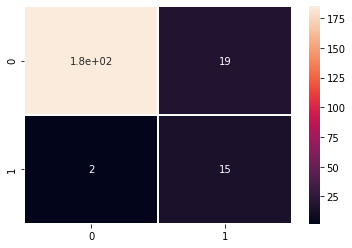

In [24]:
# Testing Set Performance
ConfusionMatrix = confusion_matrix(y_pred, y_test)
sns.heatmap(ConfusionMatrix, annot=True,linewidths=1 )
plt.show()

In [25]:
ConfusionMatrix

array([[185,  19],
       [  2,  15]])

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       187
           1       0.88      0.44      0.59        34

    accuracy                           0.90       221
   macro avg       0.89      0.72      0.77       221
weighted avg       0.90      0.90      0.89       221



Although the accuracy of the model is good , but here f1 score needs to be checked , which is on the lower side. The model needs to be further worked on to improve this number

# Trying Random Forest to check the accuracy

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_pred = model.predict(X_test)

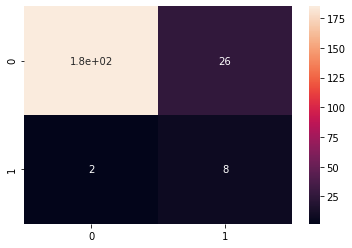

In [29]:
RFConfusionMatrix = confusion_matrix(y_pred, y_test)
sns.heatmap(RFConfusionMatrix, annot=True)

In [30]:
print("Clasiification Report from Random Forest \n",classification_report(y_test, y_pred))

Clasiification Report from Random Forest 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       187
           1       0.80      0.24      0.36        34

    accuracy                           0.87       221
   macro avg       0.84      0.61      0.65       221
weighted avg       0.86      0.87      0.84       221



Random Forest gives even lower f1 score,
From the f1-scores, we can say that the Logistic Regression Model has worked better.

## Conclusion
1. Overall the accuracy with Logistic Regression Model is better and hence the model can be used for predicting the churn for the employees
2. Employees with less total working years have higher attrition
3. Employees staying far from home have higher chances of attrition
4. Higher percentage of people leaving the firm at lower age.